# Combined sea level rise dem of pacific county and gray harbor county

In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt


In [3]:
import shapely
from osgeo import gdal
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon


In [4]:
import matplotlib.pyplot as plt

In [5]:
elev_array_gh=gdal.Open(r'/Users/ziyangliu/Downloads/WA_SEW_dems/WA_SEW1_GCS_5m_NAVD88m.tif')

In [6]:
#read tiff file of Pacific County
elev_array_pc=gdal.Open(r'/Users/ziyangliu/Downloads/WA_PQR_dems/WA_PQR_GCS_5m_NAVD88m.tif')

In [7]:
# Read in the shapefile
#get the bounding box of elev_array_gh
elev_array_gh_bounds=elev_array_gh.GetGeoTransform()
elev_array_gh_bounds

(-124.40898193837502,
 4.500000000000022e-05,
 0.0,
 47.37482299379318,
 0.0,
 -4.500000000000003e-05)

In [8]:
elev_array_pc_bounds=elev_array_pc.GetGeoTransform()
elev_array_pc_bounds

(-124.18253558149004,
 4.499999999999992e-05,
 0.0,
 46.795225604553735,
 0.0,
 -4.500000000000001e-05)

In [5]:
#get the refrerence system of elev_array_gh
elev_array_gh_proj=elev_array_gh.GetProjection()
elev_array_gh_proj

'GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4269"]]'

In [6]:
# get the number of bands
elev_array_gh_bands=elev_array_gh.RasterCount
elev_array_gh_bands

1

In [9]:
# Read the dem values of grays harbor
band = elev_array_gh.GetRasterBand(1)  # Assuming the altitude values are in the first band
altitude_values = band.ReadAsArray()

# Print the altitude values
print(altitude_values)

[[-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 ...
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]]


In [10]:
#read the dem values of pacific county
band_pc=elev_array_pc.GetRasterBand(1)
altitude_values_pc=band_pc.ReadAsArray()

In [9]:
# get the coordinates of the lower right corner of grays harbor
elev_array_gh_x=elev_array_gh_bounds[0]+elev_array_gh.RasterXSize*elev_array_gh_bounds[1]
elev_array_gh_y=elev_array_gh_bounds[3]+elev_array_gh.RasterYSize*elev_array_gh_bounds[5]
print(elev_array_gh_x,elev_array_gh_y)


-123.15708193837501 46.79004799379318


In [11]:
# Replace -9999 values with NaN (Not a Number) for masking
altitude_values_gh = np.where(altitude_values == -9999, np.nan, altitude_values)

In [12]:
altitude_values_pc = np.where(altitude_values_pc == -9999, np.nan, altitude_values_pc)

In [ ]:
ymin=-124.166466
xmax=46.926051
ymax=-123.910902
xmin=46.687529

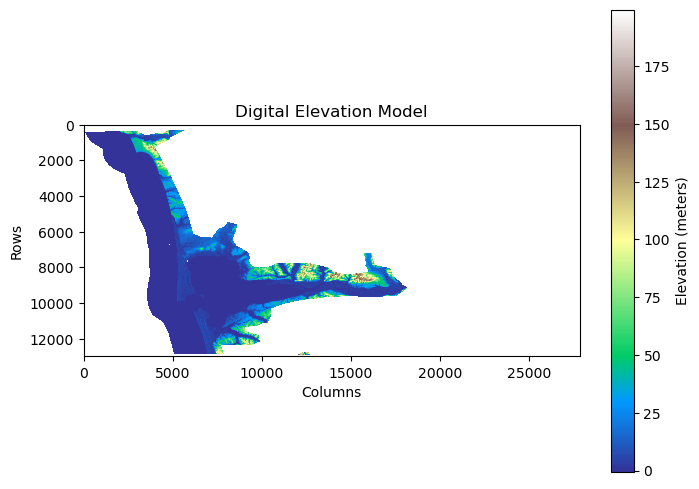

In [27]:
plt.figure(figsize=(8, 6))
plt.imshow(altitude_values_gh, cmap='terrain',vmin=np.nanmin(altitude_values_gh),vmax=np.nanmax(altitude_values_gh))  # Use 'terrain' colormap for elevation
plt.colorbar(label='Elevation (meters)')
plt.title('Digital Elevation Model')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [1]:
plt.figure(figsize=(8, 6))
plt.imshow(altitude_values_pc, cmap='terrain',vmin=np.nanmin(altitude_values_pc),vmax=np.nanmax(altitude_values_pc))  # Use 'terrain' colormap for elevation
plt.colorbar(label='Elevation (meters)')
plt.title('Digital Elevation Model_pacific county')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

NameError: name 'plt' is not defined

In [30]:
print(np.nanmin(altitude_values_gh[8000]))

-0.5


In [16]:
elev_array_pc.RasterXSize

59313

In [15]:
elev_array_gh.RasterXSize

27820

In [12]:
len(altitude_values[0])

27820

In [13]:
len(altitude_values)

12995

In [15]:
max(altitude_values[0])==-9999

True

In [16]:
# get the first row in which the max value is not -9999
for i in range(len(altitude_values)):
    if max(altitude_values[i])!=-9999:
        print(i)
        break

273


In [17]:
#get the last row in which the max value is not -9999
for i in range(len(altitude_values)-1,0,-1):
    if max(altitude_values[i])!=-9999:
        print(i)
        break

12994


In [19]:
max(altitude_values[12994])

191.20184

In [20]:
# in the last row, get the last column in which the value is larger than -9999
for i in range(len(altitude_values[12994])-1,0,-1):
    if altitude_values[12994][i]>-9999:
        print(i)
        break

12279


In [21]:
# in the last row, get the first column in which the value is larger than -9999
for i in range(len(altitude_values[0])):
    if altitude_values[12994][i]>-9999:
        print(i)
        break

11790
